In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from rocketpy import Function
from mpl_toolkits.mplot3d import Axes3D

In [16]:
df = pd.read_csv(r'Todos Cls.csv')

df.dropna(inplace = True)

# Ennvironment
rho = 1.09

# Desired Parameters
timeMax = 3
thetaDotMax = 9 #given in radians per second
thetaDotDotMax = (0 - thetaDotMax)/timeMax

# Europa
J = 0.077
V0 = 25
r = 127/2000
Lr = 2 * r
Ar = np.pi * r**2

# Fin set
N = 4
root = 0.15
tip = 0.06
span = 0.15
delta = 2 * np.pi / 180

# Canards set 
n = 4
Cr = 60 / 1000
Ct = 60 / 1000
s = 100 / 1000
alfa = 11 * np.pi / 180

In [17]:
YtCanard = (r + s/3 * ((Cr + 2 * Ct) / (Cr + Ct))) # it is the Canard's "arm"
YtFins = (r + span/3 * ((root + 2 * tip) / (root + tip))) # it is the Fin's "arm"

def cnalfa(cnalfa0, Cr, Ct, s, r, N):
    Aref = np.pi * r**2
    Af = (Cr + Ct) * s / 2; # fin area
    AR= 2 * (s**2) / Af
    gamac = np.arctan( (Cr - Ct) / (2 * s) ); # mid chord angle
    FD = 2 * np.pi * AR / (cnalfa0 *np.cos(gamac))
    return cnalfa0 * FD * (Af/Aref) * np.cos(gamac) * (N/2) / (2 + FD * ( 1 + (4/FD**2) )**0.5) 

In [18]:
alpha = [a/2 for a in range(0, 30)]
V = [v/20 for v in range(2, 14)]

X,Y = np.meshgrid(alpha, V)

Z = []
for i in range(len(X)):
    temp=[]
    for j in range(len(X[i])):
        if Y[i][j] == 0.1 or Y[i][j] == 0.3 or  Y[i][j]*10 % 1!= 0:
            temp.append(n/2 * cnalfa(float(df['M = '+ str(Y[i][j])][X[i][j]*2]), Cr, Ct, s, r, n))
        else:
            temp.append(n/2 * cnalfa(float(df['M = '+ str(Y[i][j]) + '0'][X[i][j]*2]), Cr, Ct, s, r, n))
    Z.append(temp)
Z = np.array(Z)

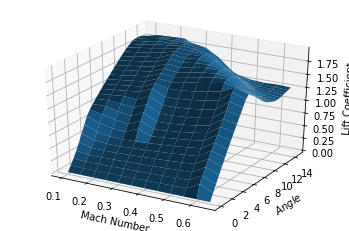

In [21]:
fig = plt.figure()
sub = fig.add_subplot(111,projection = "3d")
sub.plot_surface(Y, X, Z)
sub.set_xlabel('Mach Number')
sub.set_ylabel('$Angle$')
sub.set_zlabel('Lift Coefficient')
sub.yaxis._axinfo['label']['space_factor'] = 3.0
fig.show()